### 1. Importing Required Modules and Packages

In [16]:
import os
import sys

sys.path.append('..')
os.environ["OMP_NUM_THREADS"] = '1'  # KMeans is not parallelized, so set to 1 thread

from src.mutation import Mutation
from src.sequence import Plasmid
from src.eblocks import Eblock, EblockDesign
from src.primer import DesignPrimers
from src.plot import Plot
from src.utils import Utils, SnapGene

%reload_ext autoreload
%autoreload 2

### 2. Loading and Analyzing the Gene Sequence

The desired mutations should be added to a txt file. 
Here, we create a Mutation() object and parse the specified mutations. 

In [17]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = 'files/mutations_random_27_2024-07-31_4.txt'
mutations_file = 'files/mutations_random_56_2024-07-31_4.txt'
mutations_file = 'files/mutations_random_16_2024-07-31_4.txt'

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	E77F      
	Combined  	P105S, S152F, D121Q, F143T, V110Q
	Deletion  	T327-T335 
	Combined  	R350L, F372N, V385D, P389I, A366W
	Mutation  	T359I     
	Mutation  	A392F     
	Mutation  	S427G     
	Insert    	L534-SVKIL
	Mutation  	A562W     
	Mutation  	A598D     
	Mutation  	I653D     
	Mutation  	I680T     
	Mutation  	T723C     
	Insert    	L747-WKMGSN
	Deletion  	Q807-S814 
	Mutation  	A825S     


Next, we read the gene sequence and the vector that contains our gene of interest.

In [18]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = 'files/A0QX55.fasta'
vector_file = 'files/dnae1-inserted-2562-bp-at-14.gb'

sequence_instance = Plasmid()
sequence_instance.parse_vector(vector_file)
sequence_instance.parse_sequence(sequence_file)

dnaE1


1

We also define an output directory for the generated files and create a snapgene object for visualization

In [19]:
# Create a SnapGene instance to write the eBlocks features to a snapgene file

# Set output directory
output_dir = 'output'

snapgene_instance = SnapGene(sequence_instance=sequence_instance,
                             output_dir=output_dir)

We create an eBlockDesign instance that can initiate the design of the eblocks. Here, we choose as optimization method cost_optimization that aims to use as little basepairs as possible. Another option would be to do amount_optimization, that aims to cluster as many mutations as possible together, to get the lowest number of different eBlocks

In [20]:
# Create an Eblocks object based on the input mutations and the gene sequence

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,
                               output_dir=output_dir,
                               verbose=True,
                               cost_optimization=False,
                               amount_optimization=True)

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=output_dir,
                     show=True)

# Run the eBlocks design and print the results
design_instance.run_design_eblocks()

Starting eBlock design ...
cluster N=2 {0: [231, 315, 456, 363, 429, 330, 981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281], 1: [1602, 1617, 1686, 1794, 1959, 2040, 2169, 2241, 2259, 2421, 2442, 2475]}
cluster N=3 {2: [231, 315, 456, 363, 429, 330, 481], 1: [981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281, 1602, 1617, 1686], 0: [1794, 1959, 2040, 2169, 2241, 2259, 2421, 2442, 2475]}
cluster N=4 {0: [231, 315, 456, 363, 429, 330, 481], 1: [981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281], 3: [1602, 1617, 1686, 1794, 1959], 2: [2040, 2169, 2241, 2259, 2421, 2442, 2475]}
Optimizing based on number of eBlocks ...
Lowest number of eBlocks: 2
Directory output\clones\E77F is not empty. Files might get overwritten or appended to.
eBlock-1 [219, 1319, '#ff7f0e']
Gene-of-Interest [13, 2575, '#d3d3d3']
E77F [241, 244, 'black']
Directory output\clones\P105S-S152F-D121Q-F143T-V110Q is not empty. Files might get overwritten or appended to.
eBlock-1 [219, 1319, '#ff7f0e']

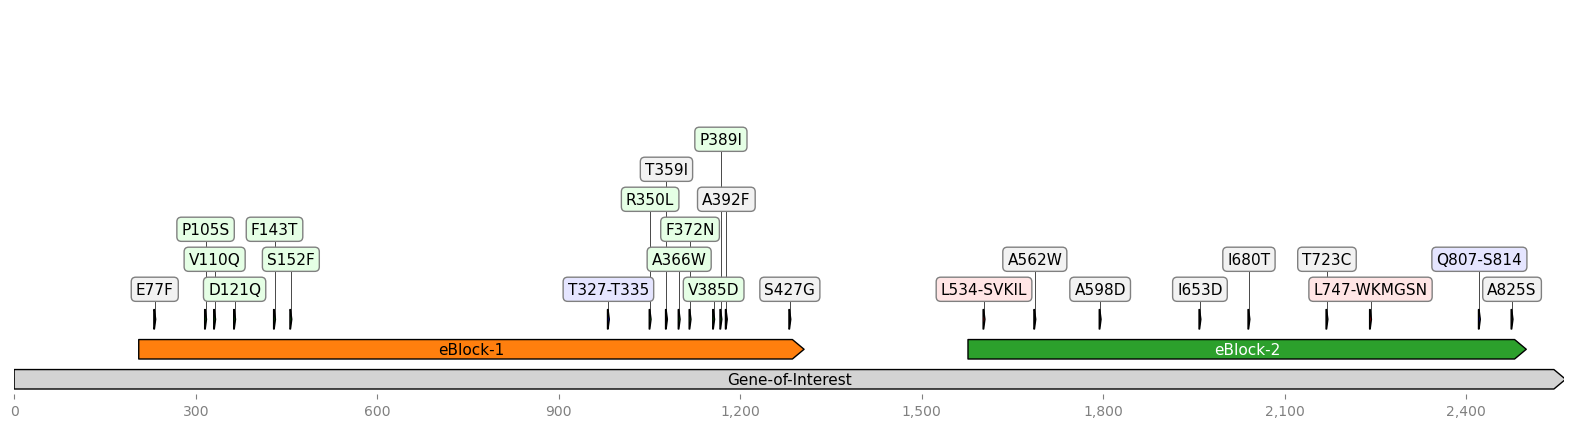

In [21]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

Starting eBlock design ...
cluster N=2 {1: [231, 315, 456, 363, 429, 330, 981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281], 0: [1602, 1617, 1686, 1794, 1959, 2040, 2169, 2241, 2259, 2421, 2442, 2475]}
cluster N=3 {1: [231, 315, 456, 363, 429, 330, 481], 0: [981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281, 1602, 1617, 1686], 2: [1794, 1959, 2040, 2169, 2241, 2259, 2421, 2442, 2475]}
cluster N=4 {0: [231, 315, 456, 363, 429, 330, 481], 2: [981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281], 3: [1602, 1617, 1686, 1794, 1959], 1: [2040, 2169, 2241, 2259, 2421, 2442, 2475]}
Optimizing based on price per bp ...
cluster N=2 1433.8
cluster N=3 924.7
cluster N=4 551.5
551.5 {0: [231, 315, 456, 363, 429, 330, 481], 2: [981, 1005, 1050, 1116, 1155, 1167, 1098, 1077, 1176, 1281], 3: [1602, 1617, 1686, 1794, 1959], 1: [2040, 2169, 2241, 2259, 2421, 2442, 2475]}
Lowest estimated cost: €551.5 (given price per bp of €0.05)
Directory output\clones\E77F is not empty. Files mi

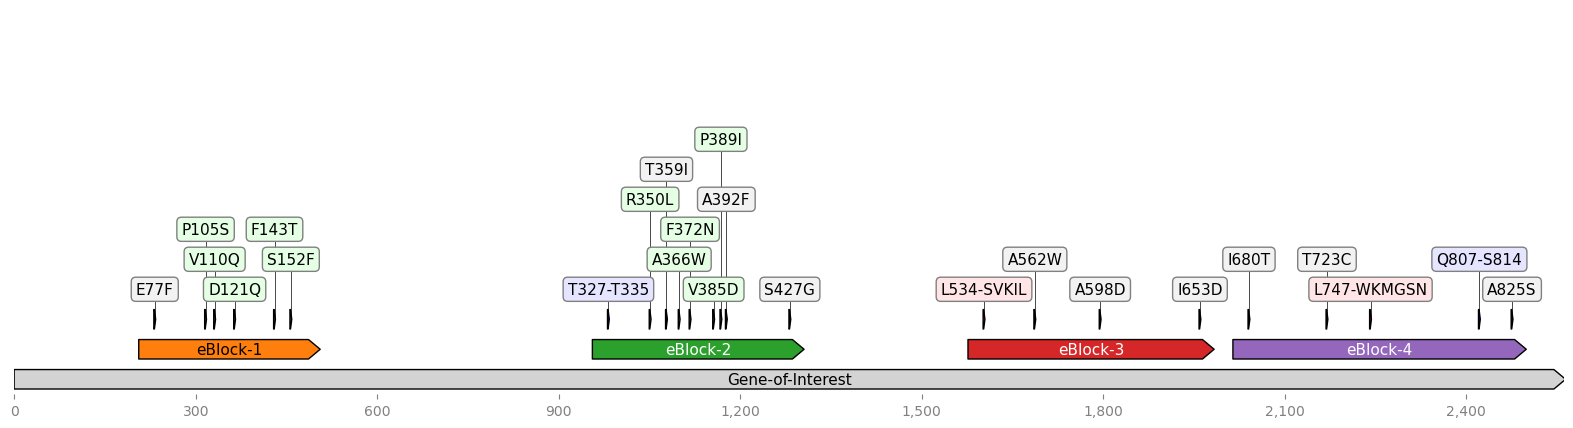

In [24]:
design_instance = EblockDesign(mutation_instance=mutation_instance,
                               sequence_instance=sequence_instance,
                               output_dir=output_dir,
                               verbose=True,
                               cost_optimization=True,
                               amount_optimization=False)

design_instance.run_design_eblocks()

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     sequence_instance=sequence_instance,
                     output_dir=output_dir,
                     show=True)

plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [ ]:
design_instance.cost_optimization

In [ ]:
design_instance.amount_optimization

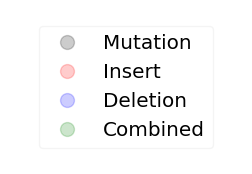

In [23]:
# Each type of mutations (insertions, deletions, substitutions) is represented by a different color, you can see the legend below

plot_instance.plot_mutation_legend()

In [ ]:
# To see how many mutations can be made in each eBlock, we can plot a histogram

plot_instance.plot_histogram_mutations()

In [ ]:
for eblock, mutation in design_instance.eblocks.items():
    print(f"{eblock}: {mutation}")

In [ ]:
# TODO Do some explanation here

In [ ]:
# TODO Save the eblocks to a file

In [ ]:
# TODO (At the end of tutorial) Remake the eBlocks but optimize for amount of eBlocks

In [ ]:
# Create a primer design object and run the primer design process for IVA primers to amplify the eblocks

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                                 eblocks_design_instance=design_instance,
                                 sequence_instance=sequence_instance, 
                                 output_dir=output_dir,
                                 snapgene_instance=snapgene_instance)

primers_instance.run_design()

In [ ]:
59 - 14

In this tutorial we will randomly design a number of mutations for the replicative DNA polymerase DnaE1 from *Mycobacterium smegmatis* to better understand it's function. <br>

The expression plasmid containing Msmeg DnaE1 is XXX and is stored in XXX. <br>

Gene from mycobrowser XXX and is stored in XXX <br>

# TODO AT THE END OF THE TURORIAL CREATE A PDF WITH ALL THE PLOTS AND THE SEQUENCES

# TODO TRY RUNNING TESTS FROM COMMAND LINE AS WELL AND SEE IF THIS WORKS

Now we will randomly design some mutations for this gene. Here, we will not generate any mutations in the N- or C- terminal region, to ensure we can create a 20bp overlap with the beginning or end of the gene in our eBlock design <br>

1. **Single point mutations** <br>

Single point mutations contain a single mutation per eBlock

2. **Multiple point mutations in same eBlock**

Multiple point mutations contain multiple mutations in the same eBlock

3. **Inserts**

Inserts contain addition of amino acids in the eBlock

4. **Deletions**

Deletions have parts of the gene deleted